The code step by step:

1. **Import Libraries**:
   ```python
   import numpy as np
   import matplotlib.pyplot as plt
   from scipy import signal
   ```
   - `numpy` is a library for numerical operations in Python.
   - `matplotlib.pyplot` is a library for creating plots and visualizations.
   - `scipy.signal` contains functions for working with signals and systems.

2. **Define Transfer Function**:
   ```python
   numerator = [1, 2]
   denominator = [1, 4, 1]
   sys = signal.TransferFunction(numerator, denominator)
   ```
   - `numerator` and `denominator` define the coefficients of the transfer function in the complex domain. In this case, `G(s) = (1 + 2s) / (s^2 + 4s + 1)`.
   - `signal.TransferFunction(numerator, denominator)` creates a transfer function object.

3. **Define Time Array**:
   ```python
   t = np.linspace(0, 10, num=1000)
   ```
   - `np.linspace(0, 10, num=1000)` creates an array of 1000 equally spaced points between 0 and 10. This will be the time array for simulation.

4. **Define Input Signal `u(t)`**:
   ```python
   K = 1
   u = np.ones_like(t) * K
   ```
   - `K` is the constant value of the input signal `u(t)`. In this case, `u(t) = 1` for all `t`.
   - `np.ones_like(t)` creates an array of ones with the same shape as `t`.
   - `np.ones_like(t) * K` multiplies each element in the array by `K`, effectively creating a constant signal.

5. **Simulate the System**:
   ```python
   t_out, y, x = signal.lsim(sys, U=u, T=t)
   ```
   - `signal.lsim()` simulates the response of a continuous-time linear system to an input signal.
   - `sys` is the transfer function.
   - `U=u` is the input signal `u(t)`.
   - `T=t` is the time array.

   The function returns `t_out` (the time array of the output signal), `y` (the output signal), and `x` (the internal states of the system, which we're not using in this case).

6. **Plot Input and Output Signals**:
   ```python
   plt.figure(figsize=(10, 5))
   plt.plot(t, u, label='Input Signal (u(t))')
   plt.plot(t_out, y, label='Output Signal (y(t))')
   plt.xlabel('Time (s)')
   plt.ylabel('Amplitude')
   plt.legend()
   plt.grid(True)
   plt.title('Input and Output Signals')
   plt.show()
   ```
   - `plt.figure(figsize=(10, 5))` sets the size of the figure for the plot.
   - `plt.plot(t, u, label='Input Signal (u(t))')` plots the input signal with time on the x-axis and `u(t)` on the y-axis. It also provides a label for the legend.
   - `plt.plot(t_out, y, label='Output Signal (y(t))')` does the same for the output signal.
   - `plt.xlabel('Time (s)')` and `plt.ylabel('Amplitude')` set the labels for the x-axis and y-axis, respectively.
   - `plt.legend()` adds a legend to the plot.
   - `plt.grid(True)` adds a grid to the plot.
   - `plt.title('Input and Output Signals')` sets the title of the plot.
   - `plt.show()` displays the plot.

This code effectively simulates a system with the given transfer function `G(s)` and plots the input and output signals over a specified time period. The input signal `u(t)` is set to a constant value `K` (in this case, `K = 1`). You can adjust `K` or other parameters to observe different system responses.

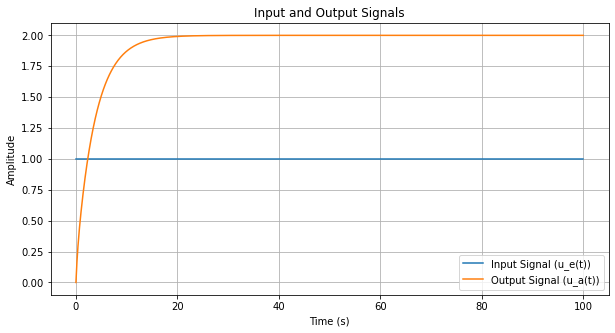

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the transfer function G(s)=(1+2s)/(s^2+4s+1)
numerator = [1, 2]
denominator = [1, 4, 1]

# Create the transfer function object
sys = signal.TransferFunction(numerator, denominator)

# Define the time array for simulation
t = np.linspace(0, 100, num=1000)

# Define the input signal u(t)
K = 1  # Adjust K as needed
u = np.ones_like(t) * K

# Simulate the system
t_out, y, x = signal.lsim(sys, U=u, T=t)

# Plot the input and output signals
plt.figure(figsize=(10, 5))
plt.plot(t, u, label='Input Signal (u_e(t))')
plt.plot(t_out, y, label='Output Signal (u_a(t))')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('Input and Output Signals')
plt.show()


Let's break down the code step by step:

1. **Imports**:
   ```python
   import matplotlib.pyplot as plt
   import numpy as np
   import control as ctrl
   ```
   - `matplotlib.pyplot` is a module for creating plots and visualizations in Python.
   - `numpy` provides support for array operations and mathematical functions.
   - `control` is a Python library for control engineering.

2. **Define Transfer Function**:
   ```python
   numerator = [1]
   denominator = [1, 2, 1]
   sys = ctrl.TransferFunction(numerator, denominator)
   ```
   - This section defines a transfer function. In this example, the transfer function is \( \frac{1}{s^2 + 2s + 1} \). You can replace the `numerator` and `denominator` lists with the coefficients of your specific transfer function.

3. **Generate Frequencies**:
   ```python
   omega = np.logspace(-2, 2, 1000)
   ```
   - This line generates a range of frequencies (`omega`) using logarithmically spaced values from \(10^{-2}\) to \(10^2\), with a total of 1000 points. This range covers a wide spectrum of frequencies.

4. **Calculate Frequency Response**:
   ```python
   _, mag, phase = ctrl.bode(sys, omega)
   ```
   - `ctrl.bode(sys, omega)` calculates the frequency response of the system `sys` at the specified frequencies `omega`. It returns magnitude (`mag`) and phase (`phase`) in dB and degrees, respectively.

5. **Convert to Real and Imaginary Parts**:
   ```python
   real_part = mag * np.cos(np.radians(phase))
   imag_part = mag * np.sin(np.radians(phase))
   ```
   - The magnitude and phase are converted to real and imaginary parts using trigonometric functions. This is necessary to plot the Ortskurve in the complex plane.

6. **Plot Ortskurve**:
   ```python
   plt.figure(figsize=(8, 8))
   plt.plot(real_part, imag_part, label='Ortskurve')
   plt.plot(real_part[0], imag_part[0], 'ro')  # Mark the starting point
   plt.xlabel('Real')
   plt.ylabel('Imaginary')
   plt.title('Ortskurve')
   plt.axhline(0, color='black', lw=0.5)
   plt.axvline(0, color='black', lw=0.5)
   plt.grid(True, linestyle='--', alpha=0.7)
   plt.legend()
   plt.show()
   ```
   - This section uses `matplotlib` to create the plot.
   - `plt.figure(figsize=(8, 8))` sets the figure size to be 8x8 inches.
   - `plt.plot(real_part, imag_part, label='Ortskurve')` plots the Ortskurve using the real and imaginary parts.
   - `plt.plot(real_part[0], imag_part[0], 'ro')` marks the starting point with a red dot.
   - The following lines set labels, title, and add gridlines to the plot.
   - `plt.show()` displays the plot.

7. **Running the Code**:
   - To use this code, you'll need to have Python installed along with the `matplotlib`, `numpy`, and `control` libraries. You can install `control` using `pip install control`.

8. **Customization**:
   - Remember to adjust the `numerator` and `denominator` lists with your specific transfer function coefficients.

By following these steps, you should be able to generate an Ortskurve for your specific transfer function.

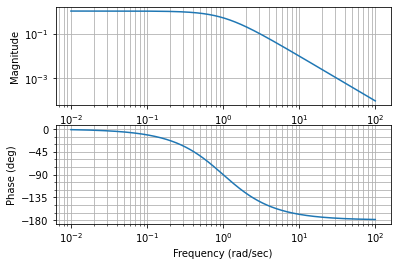

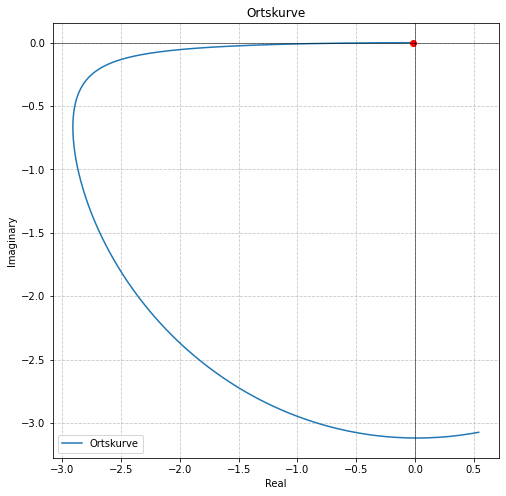

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl

# Define the transfer function (replace with your own)
numerator = [1]  # Example: s + 1
denominator = [1, 2, 1]  # Example: s^2 + 2s + 1
sys = ctrl.TransferFunction(numerator, denominator)

# Generate a range of frequencies (omega)
omega = np.logspace(-2, 2, 1000)

# Calculate the frequency response and plot Bode Diagram
_, mag, phase = ctrl.bode(sys, omega)

# Convert magnitude and phase to real and imaginary parts
real_part = mag * np.cos(np.radians(phase))
imag_part = mag * np.sin(np.radians(phase))

# Plot Ortskurve
plt.figure(figsize=(8, 8))
plt.plot(real_part, imag_part, label='Ortskurve')
plt.plot(real_part[0], imag_part[0], 'ro')  # Mark the starting point
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Ortskurve')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
